In [2]:
from keras.applications import ResNet50,ResNet152V2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [48]:
#!unzip /content/drive/MyDrive/christmas/person_detection.zip

In [3]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/Users/shikha/Documents/person_detection')
print(data_dir_list,len(data_dir_list))
path, dirs, files = next(os.walk("/Users/shikha/Documents/person_detection"))
file_count = len(files)
print(file_count)

['Ubereat1', '.DS_Store', 'zomato', 'others', 'Dunzo', 'Ubereat', 'swiggy', 'train', 'validation'] 9
1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
train_dir='/Users/shikha/Documents/person_detection/train' 
validation_dir='/Users/shikha/Documents/person_detection/validation'

In [5]:
train_cloud_dir = os.path.join(train_dir, 'Ubereat')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'Dunzo')
os.mkdir(train_foggy_dir)

train_foggy_dir = os.path.join(train_dir, 'others')
os.mkdir(train_foggy_dir)

In [6]:
validation_cloud_dir = os.path.join(validation_dir, 'Ubereat')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'Dunzo')
os.mkdir(validation_foggy_dir)

validation_foggy_dir = os.path.join(validation_dir, 'others')
os.mkdir(validation_foggy_dir)

In [7]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [8]:
!rm -rf -r /content/person_detection/Ubereat

In [9]:
SWIGGY_SOURCE_DIR = '/Users/shikha/Documents/person_detection/Ubereat/'
TRAINING_SWIGGY_DIR = '/Users/shikha/Documents/person_detection/train/Ubereat/'
VALID_SWIGGY_DIR = '/Users/shikha/Documents/person_detection/validation/Ubereat/'

ZOMATO_SOURCE_DIR = '/Users/shikha/Documents/person_detection/Dunzo/'
TRAINING_ZOMATO_DIR = '/Users/shikha/Documents/person_detection/train/Dunzo/'
VALID_ZOMATO_DIR = '/Users/shikha/Documents/person_detection/validation/Dunzo/'

ZOMATO_SOURCE_DIR = '/Users/shikha/Documents/person_detection/others/'
TRAINING_ZOMATO_DIR = '/Users/shikha/Documents/person_detection/train/others/'
VALID_ZOMATO_DIR = '/Users/shikha/Documents/person_detection/validation/others/'

In [12]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(SWIGGY_SOURCE_DIR, TRAINING_SWIGGY_DIR, VALID_SWIGGY_DIR, split_size)
split_data(ZOMATO_SOURCE_DIR, TRAINING_ZOMATO_DIR, VALID_ZOMATO_DIR, split_size)

In [13]:
img_width=256; img_height=256
batch_size=16

In [14]:

TRAINING_DIR = '/Users/shikha/Documents/person_detection/train' 

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1190 images belonging to 5 classes.


In [16]:
VALIDATION_DIR = '/Users/shikha/Documents/person_detection/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 279 images belonging to 5 classes.


In [17]:

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [18]:
# Define constants
NUM_CLASSES = 5  # Number of classes in the classification task
IMG_SIZE = (224, 224)  # Image size for ResNet50

In [18]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE, 3))

# Add custom head to the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

94765736/94765736 [==============================] - 6s 0us/step


In [19]:
## Accuracy of Resnet50 after 10 epochs#
#Test loss: 1.3721126317977905
#Test accuracy: 0.3121951222419739

In [19]:
# using Inception V3
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [20]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
# Add custom head to the pre-trained model
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=predictions)

2023-04-18 16:20:28.841386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [67]:
## Accuracy of InceptionV3 after 10 epochs
#Test loss: 0.5956321358680725
#Test accuracy: 0.8487805128097534

In [71]:
! rm -rf -r /content/person_detection

In [68]:
import keras
resnet =keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
# Add custom head to the pre-trained model
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=predictions)

In [23]:
## Accuracy of ResNet152V2 after 10 epochs
Test loss: 0.5792665481567383
Test accuracy: 0.8536585569381714

SyntaxError: invalid syntax (4100678975.py, line 2)

In [21]:

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [22]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/10
75/75 [==============================] - 157s 2s/step - loss: 1.1360 - accuracy: 0.5134 - val_loss: 365.2148 - val_accuracy: 0.3548
Epoch 2/10
75/75 [==============================] - 146s 2s/step - loss: 0.7356 - accuracy: 0.7454 - val_loss: 19.9133 - val_accuracy: 0.2545
Epoch 3/10
75/75 [==============================] - 149s 2s/step - loss: 0.5795 - accuracy: 0.8017 - val_loss: 1.2033 - val_accuracy: 0.7742
Epoch 4/10
75/75 [==============================] - 145s 2s/step - loss: 0.5807 - accuracy: 0.8160 - val_loss: 1.2129 - val_accuracy: 0.8423
Epoch 5/10
75/75 [==============================] - 144s 2s/step - loss: 0.5181 - accuracy: 0.8261 - val_loss: 0.7094 - val_accuracy: 0.7276
Epoch 6/10
75/75 [==============================] - 150s 2s/step - loss: 0.4328 - accuracy: 0.8513 - val_loss: 0.3214 - val_accuracy: 0.9032
Epoch 7/10
75/75 [==============================] - 146s 2s/step - loss: 0.3791 - accuracy: 0.8782 - val_loss: 0.6513 - val_accuracy: 0.7491
Epoch 8/10

In [24]:
# Evaluate the model
score = model.evaluate_generator(validation_generator, steps=len(validation_generator))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.45507892966270447
Test accuracy: 0.8494623899459839


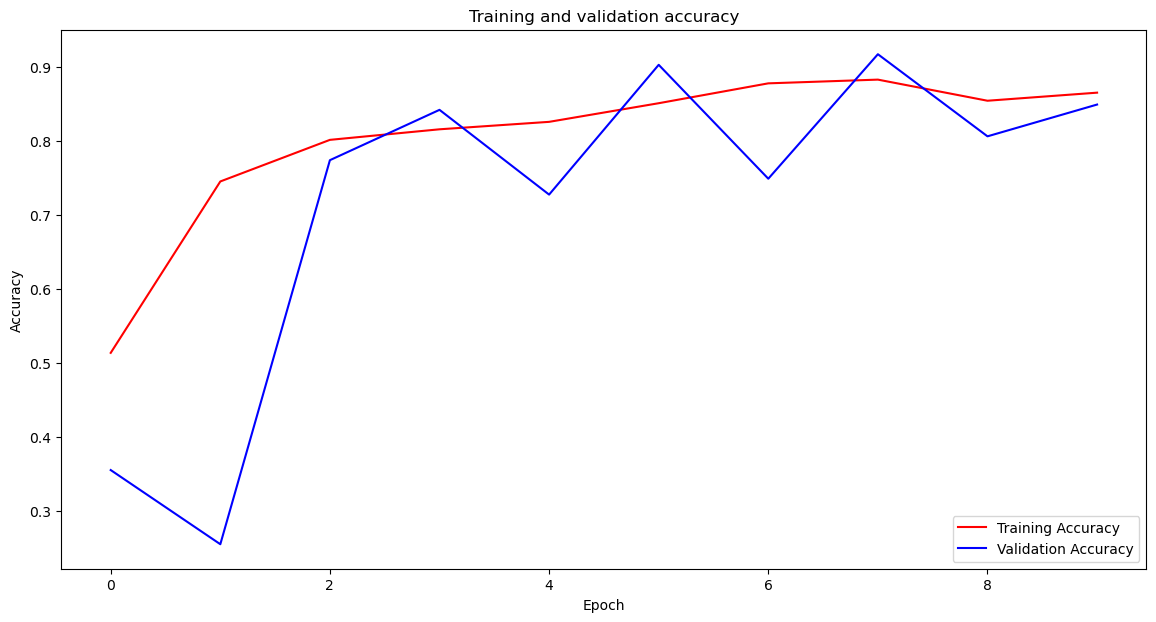

In [25]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [47]:
from google.colab import files
files.download("/content/person_detection/inceptionv3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from tensorflow.keras.models import load_model

model.save('/Users/shikha/Documents/inceptionv3.h5')


In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for test set
y_pred = model.predict(validation_generator)

# Convert predicted probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true class labels
y_true_labels = validation_generator.classes

# Print confusion matrix
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)
print(conf_mat)



18/18 [==============================] - 9s 484ms/step
[[ 7 22 19 15]
 [15 36 22 26]
 [ 8 21 17 17]
 [ 5 19 15 15]]


In [37]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the test image
img_path = '/content/person_detection/others/20200601driver_1.jpg'  # Update with the path to your test image
img = load_img(img_path, target_size=(224, 224))  # Assumes image size of (224, 224) for ResNet50
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values


In [43]:
# Get the class indices from the train generator
class_indices = train_generator.class_indices

# Reverse the dictionary mapping class indices to class labels
class_labels = {v: k for k, v in class_indices.items()}

print(class_labels)

# Make predictions on the test image
predictions = model.predict(img_array)

# Get the predicted class index with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class label
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class label:", predicted_class_label)

{0: 'Dunzo', 1: 'Ubereat', 2: 'others', 3: 'swiggy', 4: 'zomato'}
1/1 [==============================] - 0s 103ms/step
Predicted class label: others


In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
# using Inception V3
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
# Add custom head to the pre-trained model
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=predictions)